### Labb 2 Pichus or Pikachus

***Funktioner för att behandla träningsdata***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
import random as rnd

In [2]:
def euclidean(x1, y1, x2, y2):
    distance_points =np.sqrt((x1-x2)**2+(y1-y2)**2)

    return float(distance_points)


In [26]:
with open("Data/datapoints.txt", "r") as data_read:
    clean_data = [pokemon.replace(" ", "").strip().split(",") for pokemon in data_read if not pokemon.startswith("(")]
    #datapoints_1 = [pokemon for pokemon, i in enumerate(clean_data) if pokemon[i, 2] == 1]
    clean_data = [[float(point) for point in pokemon] for pokemon in clean_data]
    #print(clean_data[0][0:])
    datapoints_1 = [pokemon for pokemon in clean_data if pokemon[2] == 1]
    datapoints_0 = [pokemon for pokemon in clean_data if pokemon[2] == 0]

#euclidean_1 = [euclidean(pokemon[0], pokemon[1]) for pokemon in datapoints_1]
#euclidean_0 = [euclidean(pokemon[0], pokemon[1]) for pokemon in datapoints_0]


In [27]:
with open("Data/testpoints.txt", "r") as test_read:

    clean_test = [re.sub(r"[,()]", "", pokemon).strip().split(" ") for pokemon in test_read.readlines() if not pokemon[0].isalpha()]
    clean_test = [[float(point) for point in pokemon[1:]] for pokemon in clean_test]
    print(clean_test)


[[25.0, 32.0], [24.2, 31.5], [22.0, 34.0], [20.5, 34.0]]


In [28]:
def classifier(naigbours):
    count_pichu = 0
    count_pikachu = 0
    nearest_naighbour =""
    ten_vote = ""
    #print(naigbours)
    if naigbours[0][1] == 0:
        nearest_naighbour += "Pichu"
    if naigbours[0][1] == 1:
        nearest_naighbour += "Pikachu"
    

    for vote in naigbours[0:11]:
        if vote[1] == 0:
            count_pichu += 1
        if vote[1] == 1:
            count_pikachu += 1
    
    if count_pichu > count_pikachu:
        ten_vote += f"Pichu med {count_pichu} röster"
    else:
        ten_vote += f"Pikachu med {count_pikachu} röster"
    

    return f"Klassifierad med närmsta granne är: {nearest_naighbour}.\nGenom röstning av dom 10 närmsta punkterna: {ten_vote}."



In [29]:
def predicter(testdata):
    distance =[]
    #print(testdata)
    for train_point in clean_data:
            calc_distance = euclidean(testdata[0], testdata[1], train_point[0], train_point[1])
            distance.append((calc_distance, train_point[2]))
        
    distance.sort()
    #print(distance)
    #print(len(distance))
    return classifier(distance)    
    

In [30]:
for test in clean_test:
    print(predicter(test))


Klassifierad med närmsta granne är: Pikachu.
Genom röstning av dom 10 närmsta punkterna: Pikachu med 9 röster.
Klassifierad med närmsta granne är: Pikachu.
Genom röstning av dom 10 närmsta punkterna: Pikachu med 6 röster.
Klassifierad med närmsta granne är: Pikachu.
Genom röstning av dom 10 närmsta punkterna: Pikachu med 8 röster.
Klassifierad med närmsta granne är: Pichu.
Genom röstning av dom 10 närmsta punkterna: Pichu med 9 röster.


In [78]:
def rnd_data():
    rnd_traindata = rnd.sample(datapoints_0, 50)
    rnd_traindata += rnd.sample(datapoints_1, 50)
    rnd_testdata = [point for point in clean_data if rnd_traindata]
    return (rnd_traindata, rnd_testdata)



[[16.866105280907732, 28.984730409305136, 0.0], [17.672876665469843, 32.67247775608707, 0.0], [17.714056417303343, 31.44170391314962, 0.0], [17.96926166354966, 32.48406633310577, 0.0], [18.16229126686346, 29.93643755301725, 0.0], [18.310337204918557, 32.21783772801109, 0.0], [18.424438779822488, 31.79940219340467, 0.0], [18.43905922308554, 30.82782241883467, 0.0], [18.59843317023302, 32.60944545701523, 0.0], [18.659636883604406, 33.04492931889734, 0.0], [18.929553010373773, 33.331523282909906, 0.0], [18.989418138097026, 30.90556767082746, 0.0], [18.990689973799388, 32.387963045016726, 0.0], [19.120619567709372, 30.699542112256864, 0.0], [19.213188999276543, 31.71415755285442, 0.0], [19.299333494980544, 30.486337996080024, 0.0], [19.332572350434354, 32.25325633655492, 0.0], [19.499062316347583, 31.139578977011656, 0.0], [19.510846016895872, 29.897476657136767, 0.0], [19.55060327163345, 34.602756266320824, 0.0], [19.574019952530243, 31.935886159584427, 0.0], [19.592545899041802, 30.59392

In [ ]:
def accurcy():
    

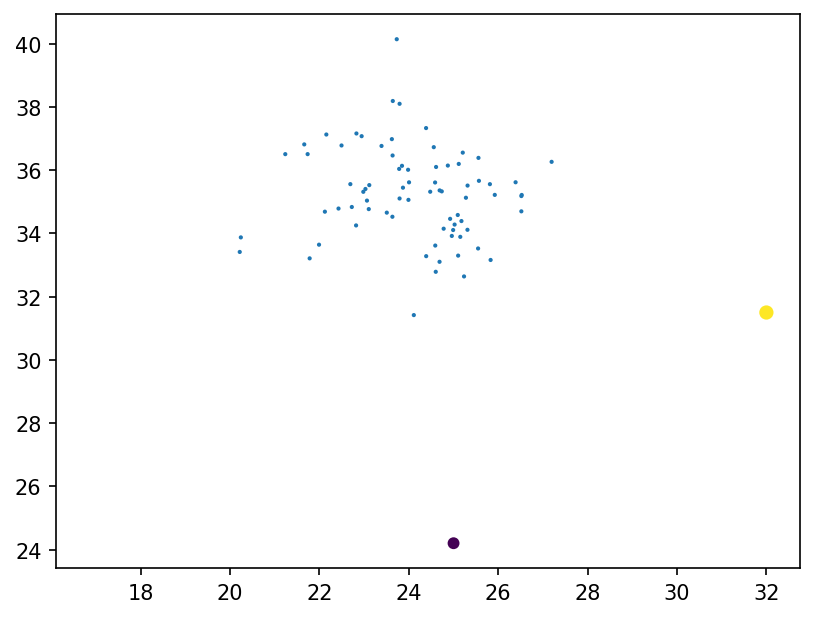

In [79]:
# Behöver en funktion som gemför en distsnsen mellen två punket och samlar in de tio närmaste punketerna

# Behöver en funktion som beräknar distansen mellan två punkter

# plot

fig, ax = plt.figure(dpi=150), plt.axes()

ax.scatter(*zip(*datapoints_1))
ax.scatter(*zip(*datapoints_0))
ax.scatter(*zip(clean_test))

plt.show()